In [3]:
import pandas as pd

df = pd.read_csv('data/video_browsing_history_full_tiktok_data.csv')
# drop duplicates - rows that have the same date and link
# but keep the rest of the columns

unique_date_and_link = df.drop_duplicates(subset=['Date', 'Link'])
#unique_date_and_link = df[['Date', 'Link']].drop_duplicates()
unique_date_and_link.head()

unique_date_and_link.to_csv('data/unique_video_browsing_history_full_tiktok_data.csv', index=False)

In [91]:
import pandas as pd

history = pd.read_csv('data/unique_video_browsing_history_full_tiktok_data.csv')
likes = pd.read_csv('data/likes_full_tiktok_data.csv')
favorites = pd.read_csv('data/favorite_videos_full_tiktok_data.csv')
share = pd.read_csv('data/share_history_full_tiktok_data.csv')

In [92]:
# Remove nan values
import numpy as np
history['Hashtags'].replace(['None', 'nan', 'N/A'], np.nan, inplace=True)
history_hashtags = history[history['Hashtags'].notna()]['Hashtags']
history_hashtags
history_hashtags_list = history_hashtags.values.tolist()
# Initialize an empty list to store the individual hashtags
individual_hashtags = []

# Iterate through the list and split each string into individual hashtags
for string in history_hashtags_list:
    hashtags = [tag.strip() for tag in string.split(',')]
    individual_hashtags.extend(hashtags)

print(len(individual_hashtags))

# Remove duplicates
individual_hashtags = list(set(individual_hashtags))
print(len(individual_hashtags))

# Remove empty strings
individual_hashtags = list(filter(None, individual_hashtags))
print(len(individual_hashtags))

697770
84334
84333


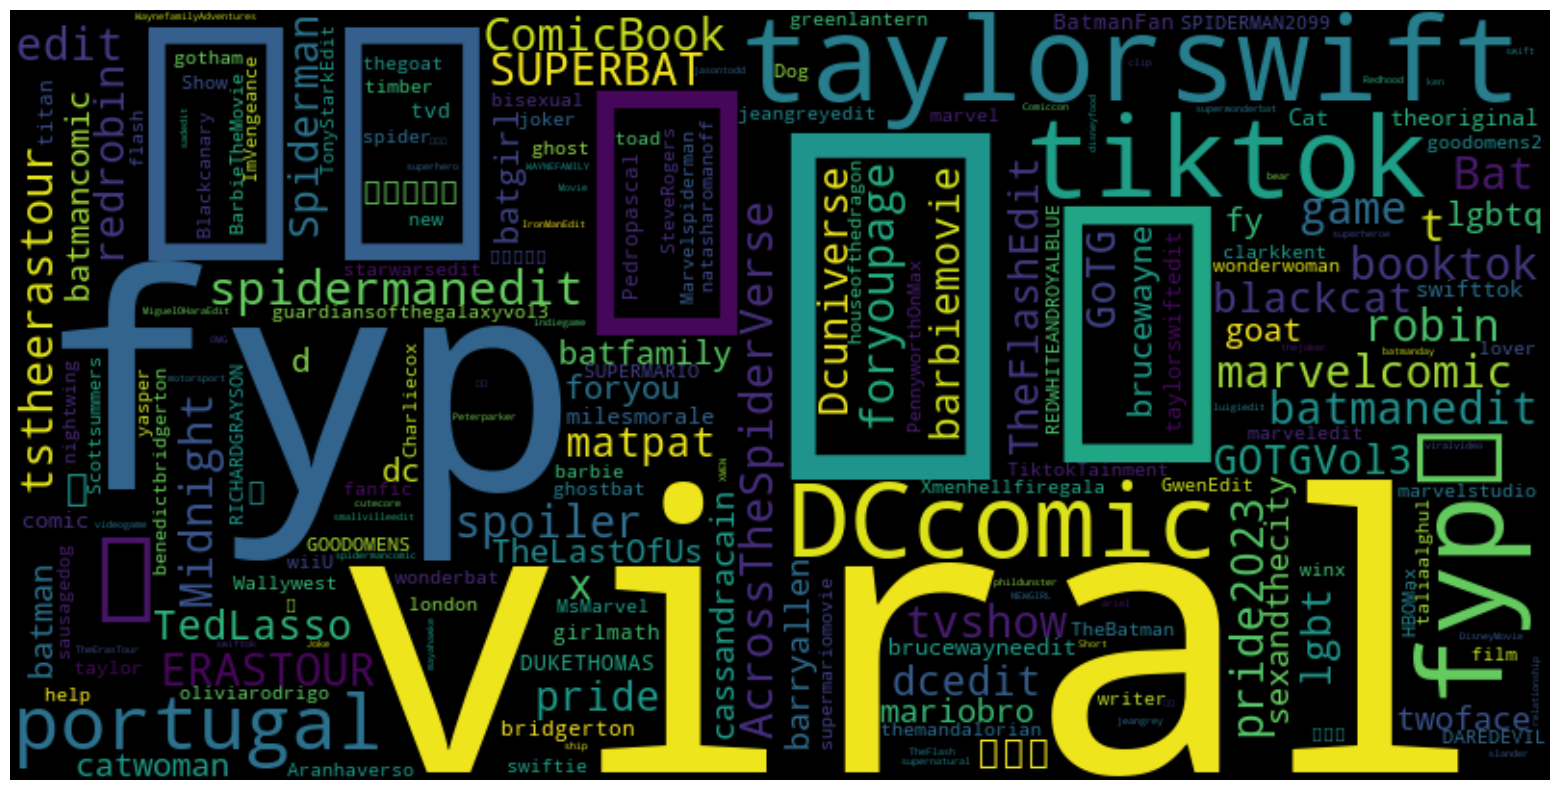

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the values in the "Hashtags" column to strings

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False).generate(' '.join(individual_hashtags))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # To remove the axis
plt.show()

We have some hashtags which are effects like CapCut, greenscreen, aftereffect
Similar stuff that we should remove #fyp, #fypシ, #fy, #foryou, #fypage, #foryoupage (Basically eliminate everything that starts with fy and foryou)
Remove nan (done)
Remove ...tok
Maybe remove #viral?

In [32]:
# see the most popular hashtags and plot them
history["Hashtags"].value_counts()

wip_plot = history["Hashtags"].dropna()
wip_plot = wip_plot.str.split(',')
wip_plot = wip_plot.explode()
wip_plot = wip_plot.str.strip()

wip_plot = wip_plot.value_counts()

# put the hashtags in a dataframe
wip_plot = pd.DataFrame(wip_plot)
wip_plot.reset_index(inplace=True)
wip_plot.columns = ['Hashtags', 'Count']


In [41]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

try_out = wip_plot["Hashtags"][:50]
similarity_threshold = 80  # You can adjust this threshold

# Create a dictionary to store clustered hashtags
clustered_hashtags = {}

# Iterate through hashtags and cluster similar ones
for hashtag in try_out:
    added = False
    for cluster, cluster_hashtag in clustered_hashtags.items():
        if fuzz.ratio(cluster_hashtag[0], hashtag) > similarity_threshold:
            clustered_hashtags[cluster].append(hashtag)
            print(clustered_hashtags[cluster])
            added = True
            break
    if not added:
        clustered_hashtags[hashtag] = [hashtag]

# Print the clustered hashtags
for cluster, hashtags in clustered_hashtags.items():
    print(f"Cluster: {', '.join(hashtags)}")

# You can decide how to represent the clustered hashtags in your final list.


['#fyp', '#fypシ']
['#fyp', '#fypシ', '#fy']
['#spiderman', '#superman']
['#erastour', '#theerastour']
['#tvd', '#tvdu']
['#dccomics', '#comics']
['#brucewayne', '#brucewayneedit']
['#edit', '#dcedit']
Cluster: #fyp, #fypシ, #fy
Cluster: #foryou
Cluster: #taylorswift
Cluster: #foryoupage
Cluster: #viral
Cluster: #edit, #dcedit
Cluster: #batman
Cluster: #dccomics, #comics
Cluster: #dc
Cluster: #marvel
Cluster: #brucewayne, #brucewayneedit
Cluster: #swifttok
Cluster: #erastour, #theerastour
Cluster: #spiderman, #superman
Cluster: #swiftie
Cluster: #xyzbca
Cluster: #tvd, #tvdu
Cluster: #greenscreen
Cluster: #starwars
Cluster: #trending
Cluster: #barbie
Cluster: #taylorsversion
Cluster: #batmanedit
Cluster: #mcu
Cluster: #tedlasso
Cluster: #thevampirediaries
Cluster: #peterparker
Cluster: #pedropascal
Cluster: #klausmikaelson
Cluster: #robin
Cluster: #taylornation
Cluster: #aftereffects
Cluster: #dcuniverse
Cluster: #stefansalvatore
Cluster: #batfamily
Cluster: #nightwing
Cluster: #fypage
Clu